In [90]:
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
# df = pd.read_excel(url, skiprows=1)  # Skip first row (column names)

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
# data (as pandas dataframes) 
X = default_of_credit_card_clients.data.features 
y = default_of_credit_card_clients.data.targets 
  
# metadata 
print(default_of_credit_card_clients.metadata) 
  
# variable information 
print(default_of_credit_card_clients.variables) 



{'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 365, 'type': 'NATIVE', 'title': 'The comparisons of data mining techniques for the predictive accuracy of 

In [91]:
# import pandas as pd
import numpy as np

df_X=pd.DataFrame(X)
col=list(default_of_credit_card_clients.variables['description'])
col[0]="ID"
col=col[1:-1]
df_X.columns = col
df_y=pd.DataFrame(y)
df_y.columns=["DEFAULT"]

df=df_X.join(df_y['DEFAULT']).copy(deep=True)

print(df)


       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [92]:

print(list(default_of_credit_card_clients.variables['description']))
print(col)

[None, 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']
['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [93]:
# import missingno as msno
# import matplotlib.pyplot as plt
# msno.matrix(df_X,labels=True, fontsize=12,width_ratios=(50,34), color=(0.2,0.4,0.6))
# plt.show()

print(df.isna().sum())

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64


In [94]:
print("Marriage:", df['MARRIAGE'].unique())
print("Education:", df['EDUCATION'].unique())
print("Sex:", df['SEX'].unique())

Marriage: [1 2 3 0]
Education: [2 1 3 5 4 6 0]
Sex: [2 1]


In [95]:
print(len(df[(df['MARRIAGE']==0) | (df['EDUCATION']==0)]))
print(len(df))


68
30000


In [96]:
df=df[(df['MARRIAGE']!=0) & (df['EDUCATION']!=0)]

In [97]:
print("Marriage:", df['MARRIAGE'].unique())
print("Education:", df['EDUCATION'].unique())
print("Sex:", df['SEX'].unique())

Marriage: [1 2 3]
Education: [2 1 3 5 4 6]
Sex: [2 1]


In [98]:
from sklearn.utils import resample
df_defaulted=df[df['DEFAULT']==0]
df_not_defaulted=df[df['DEFAULT']==1]


print(len(df_defaulted))
print(len(df_not_defaulted))

df_defaulted_downsized= resample(df_defaulted,replace=False,n_samples=4000,random_state=42)
df_not_defaulted_downsized= resample(df_not_defaulted,replace=False,n_samples=4000,random_state=42)
print('----------')
print(len(df_defaulted_downsized))
print(len(df_not_defaulted_downsized))

df=pd.concat([df_defaulted_downsized,df_not_defaulted_downsized])
print('----------')
print(len(df))

print('----------')
df=df.sample(frac=1)
df = df.reset_index(drop=True) 

23301
6631
----------
4000
4000
----------
8000
----------


In [99]:
X=df.drop(columns=['DEFAULT'],axis=1).copy(deep=True)
y=df['DEFAULT'].copy(deep=True)

In [100]:
# from sklearn.preprocessing import OneHotEncoder
# ohe=OneHotEncoder(sparse_output=False)
# temp_1=ohe.fit_transform(X[["MARRIAGE"]])
# temp_1=pd.DataFrame(temp_1,columns=["MARRIAGE_"+ str(cat) for cat in ohe.categories_[0]]).astype(int)

# temp_2=ohe.fit_transform(X[["SEX"]])
# temp_2=pd.DataFrame(temp_2,columns=["SEX_"+ str(cat) for cat in ohe.categories_[0]]).astype(int)

# temp_3=ohe.fit_transform(X[["EDUCATION"]])
# temp_3=pd.DataFrame(temp_3,columns=["EDUCATION_"+ str(cat) for cat in ohe.categories_[0]]).astype(int)

# X=X.drop(columns=["MARRIAGE","SEX","EDUCATION"])
# X=X.join(temp_1).join(temp_2).join(temp_3)

# Using pandas.get_dummies to one-hot encode multiple columns at once
X = pd.get_dummies(X, columns=["MARRIAGE", "SEX", "EDUCATION"], drop_first=False)
print(X.head())


   LIMIT_BAL  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
0     120000   28      1     -2     -2     -2     -2     -2          0   
1      50000   28      0      0      0      0      0      0      28639   
2     150000   50      0      0      0      0      0      0      88900   
3     220000   32      0      0      0      0      0      0     202010   
4     170000   40      2     -1      2     -1     -1     -1        193   

   BILL_AMT2  ...  MARRIAGE_2  MARRIAGE_3  SEX_1  SEX_2  EDUCATION_1  \
0          0  ...        True       False  False   True        False   
1      29482  ...        True       False   True  False         True   
2      91812  ...       False       False   True  False        False   
3     103124  ...       False       False   True  False        False   
4       3760  ...       False       False  False   True        False   

   EDUCATION_2  EDUCATION_3  EDUCATION_4  EDUCATION_5  EDUCATION_6  
0         True        False        False        False

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [102]:
from sklearn.preprocessing import QuantileTransformer

QuantileT=QuantileTransformer(output_distribution='normal', random_state=0)
X_train=QuantileT.fit_transform(X_train)
X_test=QuantileT.fit_transform(X_test)



In [103]:
from sklearn.svm import SVC
clf_svm=SVC(random_state=42)
clf_svm.fit(X_train,y_train)

SVC(random_state=42)

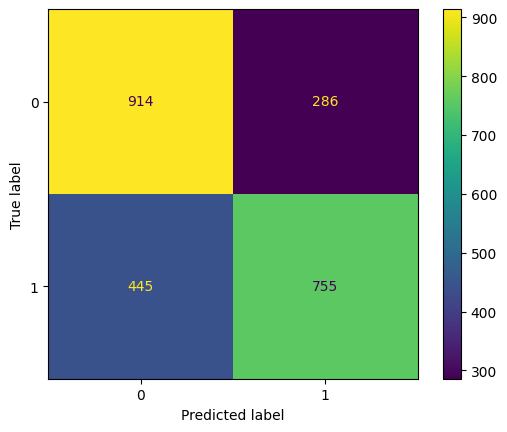

In [104]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = clf_svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=clf_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_svm.classes_)
disp.plot()
plt.show()


In [105]:
from sklearn.model_selection import GridSearchCV
# params={'C':[0.001,0.01,0.1,1,10,100,200,500,1000],
#         'gamma':['scale',0.00005,0.00001,0.0001,0.0005,0.001,0.005,1,10],
#         'kernel':['rbf','poly'],
#         'degree': [2, 3, 4, 5, 6],
#         'coef0': [0, 0.5, 1, 2, 5, 10]
# }
params={'C':[0.001,0.01,0.1,1,10,100,200,500,1000],
        'gamma':['scale',0.00005,0.00001,0.0001,0.0005,0.001,0.005,1,10],
        'kernel':['rbf'],
}
optimal_params=GridSearchCV(SVC(),
                            params,
                            cv=7,
                            scoring='accuracy',
                            verbose=1,
                            n_jobs=-2)
optimal_params.fit(X_train,y_train)
print(optimal_params.best_params_)

Fitting 7 folds for each of 81 candidates, totalling 567 fits
{'C': 100, 'gamma': 0.0005, 'kernel': 'rbf'}


In [124]:
clf_svm=SVC(C=100,gamma=0.0005,kernel='rbf')
clf_svm.fit(X_train,y_train)

SVC(C=100, gamma=0.0005)

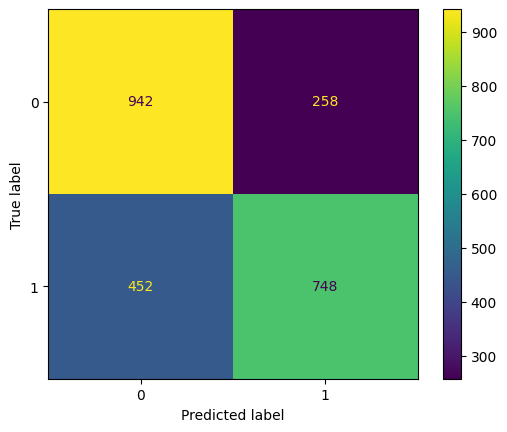

In [125]:
y_pred = clf_svm.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_svm.classes_)
disp.plot()
plt.show()

In [129]:
import pickle as pkl
with open('../created_models/svm_model.pkl', 'wb') as file:
    pkl.dump(clf_svm, file)
